# بخش اول. تبدیل متن به ویژگی با استفاده از یک کد گذاری 


In [1]:

#گام اول: ذخیره متن در یک متغیر

In [2]:
Text = "I am learning NLP"


In [3]:
#گام دوم: اجرای تابع زیر بر روی دیتای متن

# وارد کردن کتابخانه

import pandas as pd

# ایجاد ویژگی ها
pd.get_dummies(Text.split())


,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


# بخش دوم: تبدیل متن به ویژگی با استفاده از count vectorizing

In [2]:
#وارد کردن تابع
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["I love NLP and I will learn NLP in 2month "]

# ایجاد تغییرات
vectorizer = CountVectorizer()

# tokenizing
vectorizer.fit(text)
vector = vectorizer.transform(text)
# خلاصه کردن و تولید خروجی
print(vectorizer.vocabulary_)
print(vector.toarray())


{'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
[[1 1 1 1 1 2 1]]


# ساخت N-Gram

### For example, “I am learning NLP”
###Unigrams:
###“I”, “am”, “ learning”, “NLP” Bigrams: “I am”, “am ###learning”, “learning NLP” Trigrams: “I am learning”, ###“am learning NLP” 

In [3]:
Text = "I am learning NLP"


In [4]:
import textblob
from textblob import TextBlob
#For unigram : Use n = 1
TextBlob(Text).ngrams(1)


[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

In [5]:
TextBlob(Text).ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

In [6]:
TextBlob(Text).ngrams(3)

[WordList(['I', 'am', 'learning']), WordList(['am', 'learning', 'NLP'])]

# بخش چهار: ویژگی های مبتنی بربایگرام برای یک فایل متن

درست مثل آخرین دستورالعمل ، ما از بردار شمارش برای تولید ویژگی ها استفاده خواهیم کرد. با استفاده از همان عملکرد ، به ما ویژگی های bigram را تولید می کنیم و می بینیم که خروجی چگونه به نظر می رسد.

In [7]:
#وارد کردن تابع
from sklearn.feature_extraction.text import CountVectorizer
# متن
text = ["I love NLP and I will learn NLP in 2month "]
# ایجاد تغییرات
vectorizer = CountVectorizer(ngram_range=(2,2))
# tokenizing
vectorizer.fit(text)
# کد گذاری متن
vector = vectorizer.transform(text)
# خلاصه سازی و تولید خروجی
print(vectorizer.vocabulary_)
print(vector.toarray())


{'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2month': 1}
[[1 1 1 1 1 1 1]]


# تبدیل متن به ویژگی با استفاده از TF-IDF

 

In [8]:

#گام اول: نوشتن یک متن به عنوان مثال
Text = ["The quick brown fox jumped over the lazy dog.", "The dog.", "The fox"]
 

In [9]:
#گام دوم: ساخت ویژگی ها

#اجرای کدهای زیر بر روی دیتای متن
#وارد کردن تابع TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer#Create the transform
vectorizer = TfidfVectorizer()
#Tokenize و ساخت واژه
vectorizer.fit(Text)
#خلاصه سازی
print(vectorizer.vocabulary_)
print(vectorizer.idf_)



{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]


# # پیاده سازی Word Embedding


This recipe assumes that you have a working knowledge of how a neural network works and the mechanisms by which weights in the neural network are updated.
If new to a Neural Network (NN), it is suggested that 

In [19]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2','months'], 
             ['nlp', 'is', 'future'],
             [ 'nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]


In [21]:
#import library
#!pip install gensim
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [22]:
# training the model
skipgram = Word2Vec(sentences, size =50, window = 3, min_count=1, sg = 1)
print(skipgram)
# access vector for one word
print(skipgram['nlp'])


C:\Users\sh.noori\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


Word2Vec(vocab=21, size=50, alpha=0.025)
[ 0.0072992   0.00367548  0.00823757 -0.00084062 -0.0044538  -0.00490562
 -0.00103533 -0.00422465 -0.00025795  0.0086272  -0.0044317   0.00419986
  0.00300491  0.00959263  0.00799518 -0.00223843  0.0011204  -0.00480288
  0.00595891 -0.00124386  0.00288995  0.0063262  -0.00125227  0.00420644
 -0.00312588 -0.00291068 -0.00012065 -0.0073508   0.00020764 -0.00060821
 -0.00506583 -0.00106298 -0.00171794  0.00905753 -0.0035702   0.00163711
 -0.00748463 -0.00859896  0.00570964  0.00538062  0.00327103 -0.00198328
  0.00292277 -0.0070638  -0.00719389  0.00871989 -0.00901447  0.00263772
 -0.00276803 -0.00078713]


C:\Users\sh.noori\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [24]:
# save model
skipgram.save('skipgram.bin')
# load model
skipgram = Word2Vec.load('skipgram.bin')

In [25]:
#T – SNE plot is one of the ways to evaluate word embeddings. Let’s generate it and see how it looks.
# T – SNE plot
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


C:\Users\sh.noori\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


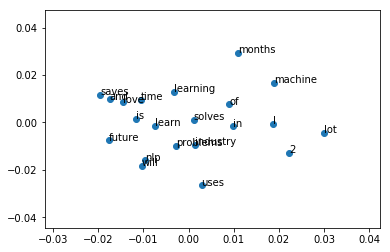

In [26]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
